<a href="https://colab.research.google.com/github/SeanHwangG/LEARN_PYTHON/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
from torchvision import datasets, transforms
from torch import nn
from torch import optim

torch.manual_seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
np.random.seed(0)

In [19]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_ds = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=True, transform=transform)
train_dl = torch.utils.data.DataLoader(train_ds, batch_size=64, shuffle=True)

test_ds = datasets.FashionMNIST('~/.pytorch/FMNIST/', download=True, train=True, transform=transform)
test_dl = torch.utils.data.DataLoader(test_ds, batch_size=64, shuffle=True)

In [20]:
class FMNIST(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 128)
    self.fc2 = nn.Linear(128, 64)
    self.fc3 = nn.Linear(64, 10)
  
  def forward(self, x):
    x = x.view(x.shape[0], -1)

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)
    x = F.log_softmax(x, dim=1)

    return x

In [21]:
model = FMNIST()

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

num_epochs = 3

for i in range(num_epochs):
  cum_loss = 0
  for images, labels in train_dl:
    optimizer.zero_grad()
    output = model(images)
    loss = criterion(output, labels)
    loss.backward()
    optimizer.step()
    cum_loss += loss.item()
  print(f"Train Loss: {cum_loss / len(train_dl)}")

Train Loss: 1.033089838969682
Train Loss: 0.5605184560391441
Train Loss: 0.4899654548877338


In [26]:
images, labels = next(iter(test_dl))

test_image_id = 17
img = images[test_image_id].view(1, 784)

with torch.no_grad():
  logps = model(img)

<BarContainer object of 10 artists>

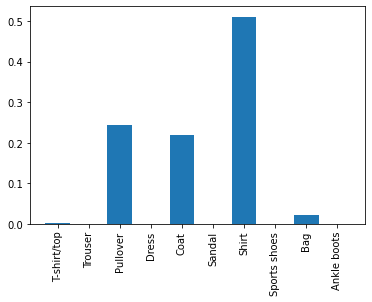

In [31]:
ps = torch.exp(logps)
nps = ps.numpy()[0]
FMNIST_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sports shoes', 'Bag', 'Ankle boots']
plt.xticks(np.arange(10), labels=FMNIST_labels, rotation='vertical')
plt.bar(np.arange(10), nps)

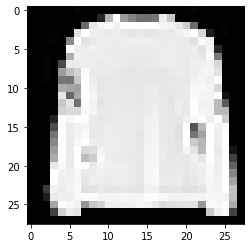

In [32]:
def denormalize(tensor):
  return tensor * 0.5 + 0.5

img = denormalize(img.view(28, -1))
plt.imshow(img, cmap='gray')